In [ ]:
from abscr.omero_connection import connector
import numpy as np

## Create a connection via OmeroClient

Do not forget to change to your username

In [ ]:
user = ''
host = ''
client = connector.OmeroClient(username=user, host=host)

## Set the group id we want to work with

In [ ]:
group_id = 3  # Default group
#group_id = 611  # ABSCR group
client.set_omero_group(group_id)

## Create a new project

In [ ]:
prj_name = 'TestProject'
prj_id = client.create_project(project_name=prj_name)
print(prj_id)

## Create a new dataset

In [ ]:
dataset_id = client.create_dataset(dataset_name='NewTestDataset', project_id=prj_id)
print(dataset_id)

## Post a new image to the Omero dataset we just created

Create a dummy image as `np.array`

In [ ]:
test_image = np.random.randint(0, 2, (512, 512, 1, 3, 1), dtype='int16')

Post the image

In [ ]:
im_id = client.post_image(image_array=test_image, image_name="dummy_image", dataset_id=dataset_id)
print(im_id)

## Create a dummy ROI object and add to the image

Get image object first

In [ ]:
img_obj = client.get_image_cursor(im_id)

Render the image

In [ ]:
img_obj.renderImage(0, 0)

In [ ]:
client.show_img_info(img_obj)

In [ ]:
from ezomero.rois import Point, Rectangle, Polygon

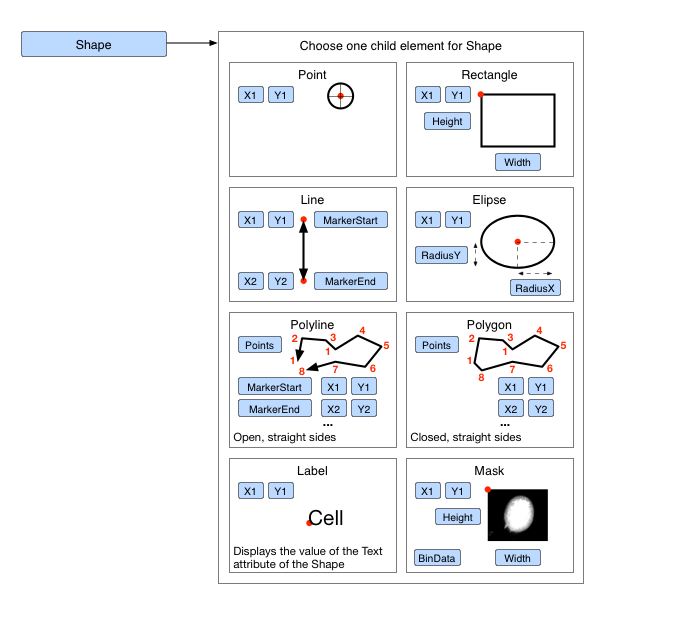
<br>
https://docs.openmicroscopy.org/ome-model/5.6.3/developers/roi.html

Create a simple polygon with numpy

In [ ]:
polygon = np.array([[20, 100], [100, 200], [200, 100]])

In [ ]:
client.show_img_info(img_obj)

In [ ]:
roi_ = client.register_shape_to_roi(image=img_obj, polygon=polygon, text='TestROI')
roi_.getId()._val

## Let's check the ROI in the Omero web-client

You should see the following triangular ROI

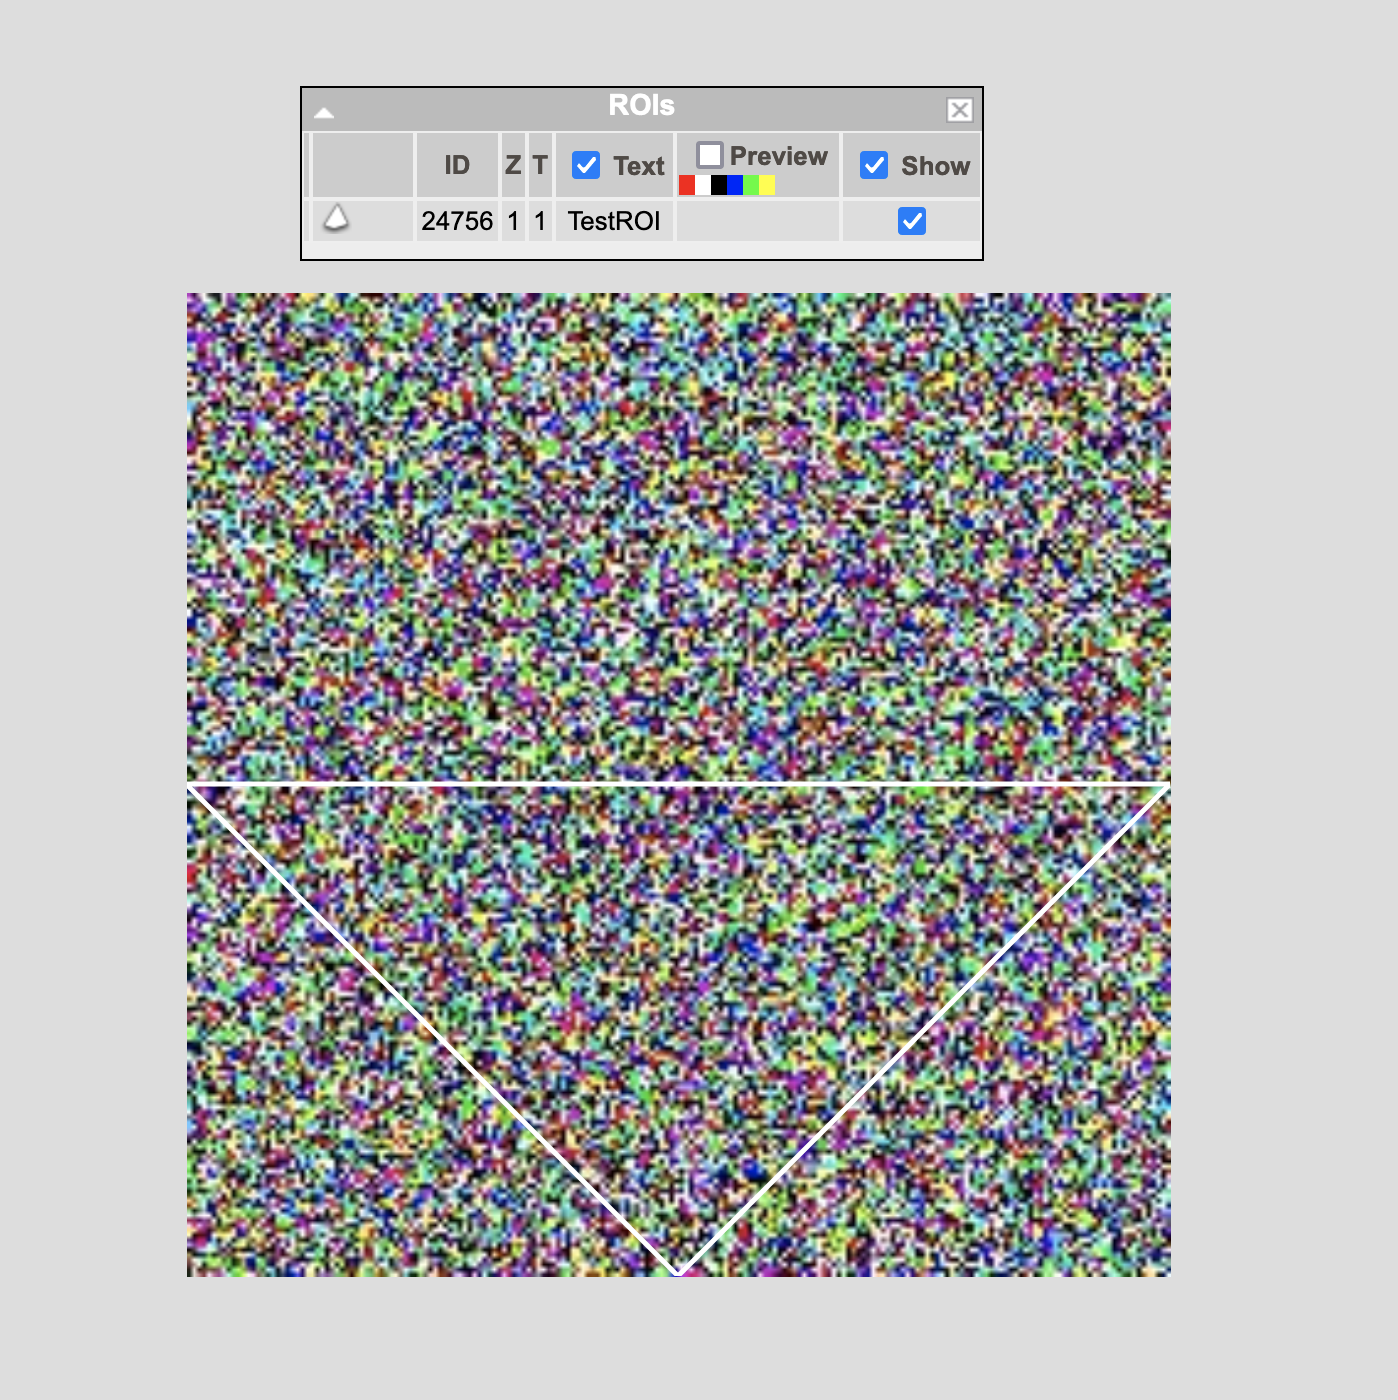

## Close the connection

In [ ]:
client.close()